In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Planck data:
with open("fisher_data/planck_n=0/planck_sigma_dmeff_n=0.txt") as f:
    data = f.read()
    data = data.split('\n')
    y0 = [float(row.split(' ')[1]) for row in data]
    x0 = [float(row.split(' ')[0]) for row in data]
    step0 = [float(row.split(' ')[2]) for row in data]
    
with open("fisher_data/planck_n=2/planck_sigma_dmeff_n=2.txt") as f2:
    data2 = f2.read()
    data2 = data2.split('\n')
    y2 = [float(row.split(' ')[1]) for row in data2]
    x2 = [float(row.split(' ')[0]) for row in data2]
    step2 = [float(row.split(' ')[2]) for row in data2]

[-1.8612307999999997e-27, -2.5382473e-27, 8.840360304760067e-26, 1.8066456349943005e-25, 1.0301732495997496e-24, 1.053157284960207e-23]


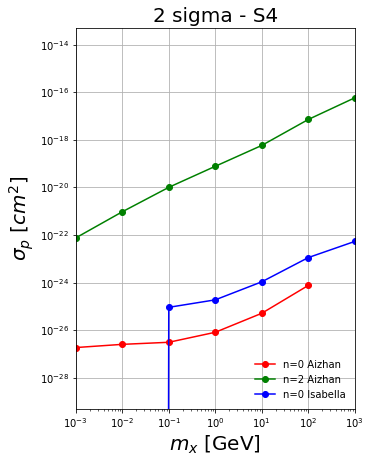

In [86]:
                    ############### S4 data: ###############
#Isabella
m_n0 = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
sigma_n0 = [0, 0, 9.150500754760067e-26, 1.8883599099943004e-25, 1.0815574075997496e-24, 1.129298921960207e-23, 5.401010220380977e-23
]

#Aizhan
# n=0
masses_n0 = [0.001, 0.01, 0.1, 1, 10, 100]
sigma_dmeff_95_S4_n0 = [1.8612307999999997e-27, 2.5382473e-27, 3.1014045e-27, 8.1714275e-27, 5.1384158e-26, 7.6141637e-25]
# n=2
masses_n2 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
sigma_dmeff_95_S4_n2 = [7.595824e-23, 9.516704800000001e-22, 1.0158481e-20, 7.785000900000001e-20, 5.874233000000001e-19, 7.2368819e-18, 5.9086241e-17]

#residual 
residual_n0 = [a_i - b_i for a_i, b_i in zip(sigma_n0,sigma_dmeff_95_S4_n0)]
print(residual)

#S4 PLOT:

fig, ax = plt.subplots(figsize=(5, 7))
ax.plot(masses_n0, sigma_dmeff_95_S4_n0, 'ro-',label='n=0 Aizhan')
ax.plot(masses_n2, sigma_dmeff_95_S4_n2, 'go-',label='n=2 Aizhan')
ax.plot(m_n0, sigma_n0, 'bo-',label='n=0 Isabella')
ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()

plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel(r"$\sigma_p$ [$cm^2$]",fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
fig.savefig("fisher_plots/upperlimit_crosssection_S4.png")
plt.title('2 sigma - S4',fontsize=20)
plt.show()

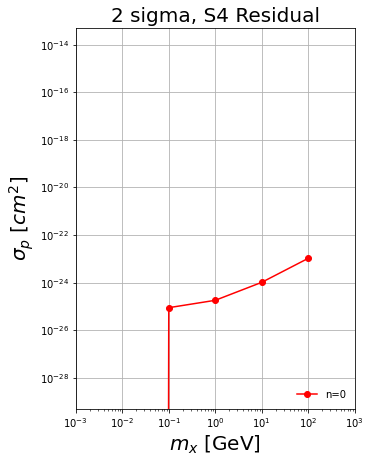

In [82]:
#RESIDUAL

fig, ax = plt.subplots(figsize=(5, 7))
ax.plot(masses_n0, residual_n0, 'ro-',label='n=0')
ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()

plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel(r"$\sigma_p$ [$cm^2$]",fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
plt.title('2 sigma, S4 Residual',fontsize=20)
plt.show()

/anaconda2/envs/idm/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.35710286e-18 3.92172176e-01 1.00000000e+00]
[1.4340331061231686e-26, 6.30081902435056e-26, 8.268992428164477e-26, 1.08519599615209e-25, 1.4241763555779891e-25, 2.922037395794891e-25, 3.834787986650969e-25]


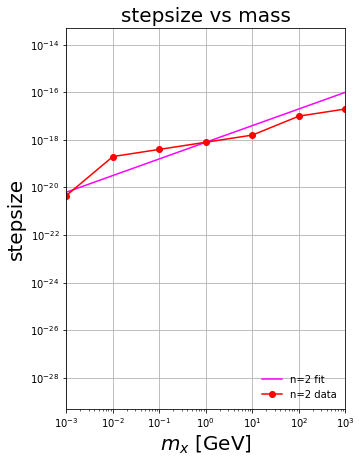

In [83]:
# FITTING LINE FOR STEPSIZE vs MASS
from scipy.optimize import curve_fit
def powlaw(x2, a, b, c):
    return a * np.power(x2, b)
def fun(x):
    return 8e-19 * np.power(x2, 0.70)

fig, ax = plt.subplots(figsize=(5, 7))
popt, pcov = curve_fit(powlaw, x2, step2)

print(popt)
print([i for i in powlaw(step2, *popt)])
#ax.plot(x2, powlaw(step2, *popt), 'b-',label='n=2 fit2')
ax.plot(x2, fun(step2), 'magenta',label='n=2 fit')
ax.plot(x2, step2, 'ro-',label='n=2 data')

ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()
plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel('stepsize',fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
fig.savefig("fisher_plots/upperlimit_crosssection.png")
plt.title('stepsize vs mass',fontsize=20)

plt.show()